In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  # Adjusts the configuration of the plot we will create

# Read in the data

df = pd.read_csv(r'C:\Users\Tanya\Desktop\movies.csv')


In [2]:
# Lets look at the data

In [3]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
# Lets see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col, pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [5]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
df = df.fillna(0)

In [7]:
# changing data type

df['budget'] = df['budget'].astype('int64')


df['gross'] = df['gross'].astype('int64')

In [59]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       6      0  2009       697    7.8  1100000.0      1155    1779   
7445   535       6      0  2019       184    8.4   903000.0       162     744   
3045  6896       6      6  1997       705    7.8  1100000.0      1155    1779   
6663  5144       6      0  2015       699    7.8   876000.0      1125    2551   
7244   536       6      0  2018       193    8.4   897000.0       162     744   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  2335       56  237000000  2847246203     2254    162.0           29  
7445  2242       56  356000000  2797501328     1607    181.0           39  
3045  1596       56  200000000  2201647264     2254    194.0           17  
6663   525       56  245000000  2069521700     1541    138.0           35  
7244  2242       56  321000000  2048359754     1607    149.0           38

In [ ]:
# create correct year column

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(str)
df

In [44]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [45]:
pd.set_option('display.max_rows', None)

In [46]:
# Drop any duplicates

df['company'].sort_values
df.drop_duplicates()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       6      0  2009       697    7.8  1100000.0      1155    1779   
7445   535       6      0  2019       184    8.4   903000.0       162     744   
3045  6896       6      6  1997       705    7.8  1100000.0      1155    1779   
6663  5144       6      0  2015       699    7.8   876000.0      1125    2551   
7244   536       6      0  2018       193    8.4   897000.0       162     744   
7480  6194       5      2  2019      1489    6.9   222000.0      1455    1920   
6653  2969       6      0  2015      1705    7.0   593000.0       517    3569   
6043  5502       6      0  2012      2473    8.0  1300000.0      1517    2315   
6646  2145       6      0  2015       222    7.1   370000.0      1189     707   
7494  2131       5      2  2019      2677    6.8   148000.0       432    1951   
6644   534       6      0  2015      2236    7.3   777000.0      1517    2315   
7247   791       6      0  2018       960    7.3   661000.0      2457    3796   
5845  2407       6      1  2011      1446    8.1   790000.0       679    4053   
7075  5145       6      0  2017       662    7.0   581000.0      2282    3519   
7271  2970       6      0  2018      1800    6.2   277000.0      1121    1094   
6262  2130       5      2  2013      2716    7.4   585000.0       432    1951   
7072   657       5      7  2017      2023    7.1   283000.0       250    4001   
7281  2760       5      2  2018      1730    7.6   263000.0       303     492   
7055  5833       6      0  2017        62    6.6   214000.0       835    1432   
6244  2823       6      0  2013      2450    7.1   779000.0      2543    1175   
6688  3622       5      2  2015      1396    6.4   218000.0      1639     535   
6846  1056       6      0  2016      2489    7.8   694000.0       162     744   
7250   474       6      0  2018       749    6.9   404000.0      1189     991   
4245  6221       6      0  2003       681    8.9  1700000.0      2193    1746   
7458  5084       6      0  2019      1502    7.5   359000.0      1463     705   
7456  1061       6      0  2019      2214    6.8   478000.0       147     256   
5878  6968       6      0  2011      1871    6.2   390000.0      1886    1238   
6059  4951       6      0  2012      2805    7.7   642000.0      2476    3126   
6494  6967       6      0  2014      1850    5.6   302000.0      1886    1238   
2448  6194       2      2  1994      1812    8.5   970000.0      2415    1703   
6047  5726       6      0  2012      1511    8.4  1600000.0       483    2266   
7463  5141       6      0  2019       732    6.5   394000.0      1125     715   
7450  2930       7      5  2019      3063    8.4  1000000.0      2767    4249   
7488  6949       2      2  2019      1788    7.7   217000.0      1509    2159   
5685  6948       2      2  2010      1753    8.2   776000.0      1678    2159   
4852  4258       6      0  2006      1646    7.3   668000.0       996    4148   
6869  4616       6      0  2016       674    7.8   572000.0       912     718   
7481   290       5      1  2019      2395    6.9   239000.0      1031    2079   
5860  4261       6      0  2011      2351    6.6   492000.0      2341    4148   
7140  1552       5      2  2017      1897    6.3   119000.0      1639     759   
2245  2967       6      0  1993      1690    8.1   894000.0      2660    2932   
6908  1978       5      2  2016      1745    7.3   250000.0       124     216   
3451  5138       5      0  1999      2319    6.5   748000.0       963    1473   
5667   300       5      1  2010      2183    6.4   392000.0      2745    2608   
6863  7504       5      2  2016      2176    8.0   450000.0       362     577   
6045  6001       6      1  2012       652    7.8   773000.0      2193    1360   
3843  2412       5      1  2001      2594    7.6   685000.0       435    1742   
5243  5725       6      0  2008      1477    9.0  2400000.0       483    2266   
5652  2406       6      1  2010      

In [47]:
# Budgete have  a high correlation
# Company have  a high correlation

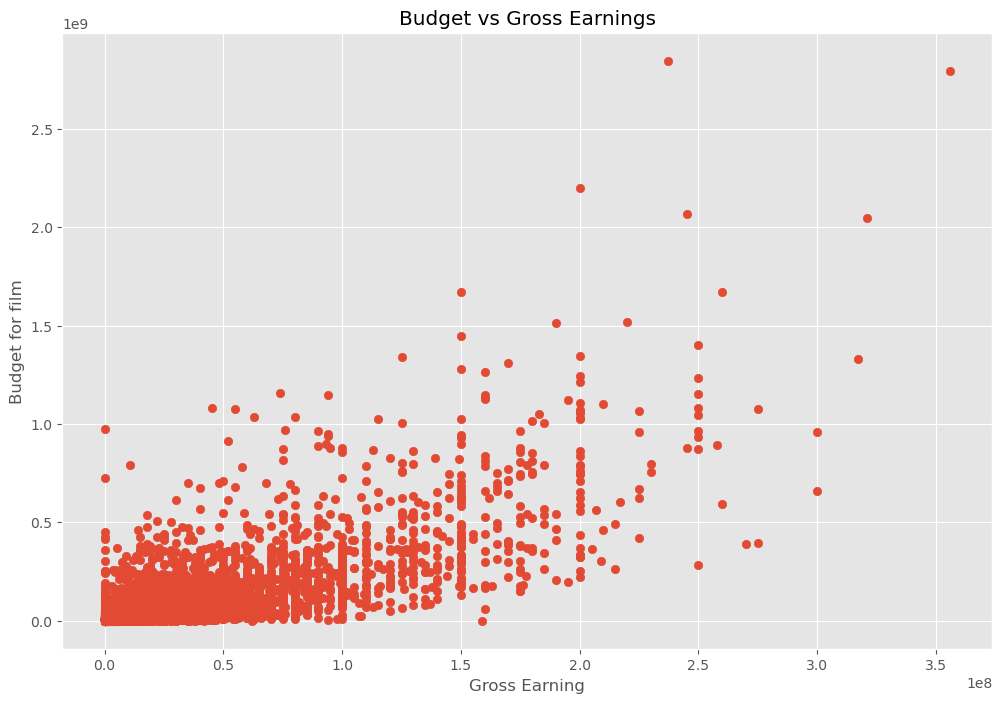

In [48]:
# Scatter plot with budget vs gross revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earning')

plt.ylabel('Budget for film')

plt.show()

In [49]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       6      0  2009       697    7.8  1100000.0      1155    1779   
7445   535       6      0  2019       184    8.4   903000.0       162     744   
3045  6896       6      6  1997       705    7.8  1100000.0      1155    1779   
6663  5144       6      0  2015       699    7.8   876000.0      1125    2551   
7244   536       6      0  2018       193    8.4   897000.0       162     744   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  2335       56  237000000  2847246203     2254    162.0           29  
7445  2242       56  356000000  2797501328     1607    181.0           39  
3045  1596       56  200000000  2201647264     2254    194.0           17  
6663   525       56  245000000  2069521700     1541    138.0           35  
7244  2242       56  321000000  2048359754     1607    149.0           38

In [50]:
# Plot the budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

<AxesSubplot:xlabel='budget', ylabel='gross'>

In [51]:
# Let's start looking at correlation

In [52]:
df.corr(method='pearson') # pearson, kendall, spearman

name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.016377   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613  0.006192   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027384   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.092616   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.039814   
score        0.016377  0.006192  0.027384  0.092616  0.039814  1.000000   
votes        0.013038  0.033743 -0.145296  0.222427  0.015878  0.407101   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.010568   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.022098   
star         0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.000026   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133346   
budget       0.020548 -0.081939 -0.334021  0.309212  0.009145  0.056863   
gross        0.006989 -0.095450 -0.234297  0.261900  0.000519  0.186012   
company      0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.005081   
runtime      0.008483  0.064133 -0.052914  0.116358  0.004852  0.394564   
yearcorrect  0.011134  0.007054 -0.077550  0.997295 -0.005455  0.100212   

                votes  director    writer      star   country    budget  \
name         0.013038  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating       0.033743  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre       -0.145296 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year         0.222427 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released     0.015878 -0.001478 -0.002404  0.015777 -0.020427  0.009145   
score        0.407101  0.010568  0.022098 -0.000026 -0.133346  0.056863   
votes        1.000000  0.000349  0.001127 -0.019146  0.073525  0.486931   
director     0.000349  1.000000  0.299067  0.039234  0.017490  0.004976   
writer       0.001127  0.299067  1.000000  0.027245  0.015343 -0.025911   
star        -0.019146  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country      0.073525  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget       0.486931  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross        0.632870 -0.014916 -0.022997 -0.001129  0.095325  0.750157   
company      0.133457  0.004404  0.005646  0.012442  0.095548  0.186474   
runtime      0.306984  0.017062 -0.004036  0.009418 -0.073319  0.268372   
yearcorrect  0.217856 -0.020439 -0.008807 -0.027576 -0.082274  0.299603   

                gross   company   runtime  yearcorrect  
name         0.006989  0.009211  0.008483     0.011134  
rating      -0.095450 -0.032943  0.064133     0.007054  
genre       -0.234297 -0.071067 -0.052914    -0.077550  
year         0.261900 -0.010431  0.116358     0.997295  
released     0.000519 -0.010474  0.004852    -0.005455  
score        0.186012  0.005081  0.394564     0.100212  
votes        0.632870  0.133457  0.306984     0.217856  
director    -0.014916  0.004404  0.017062    -0.020439  
writer      -0.022997  0.005646 -0.004036    -0.008807  
star        -0.001129  0.012442  0.009418    -0.027576  
country      0.095325  0.095548 -0.073319    -0.082274  
budget       0.750157  0.186474  0.268372     0.299603  
gross        1.000000  0.156745  0.244339     0.254686  
company      0.156745  1.000000  0.037537    -0.016109  
runtime      0.244339  0.037537  1.000000     0.114737  
yearcorrect  0.254686 -0.016109  0.114737     1.000000

In [53]:
# High correlation between budget and gross
# correct assumption

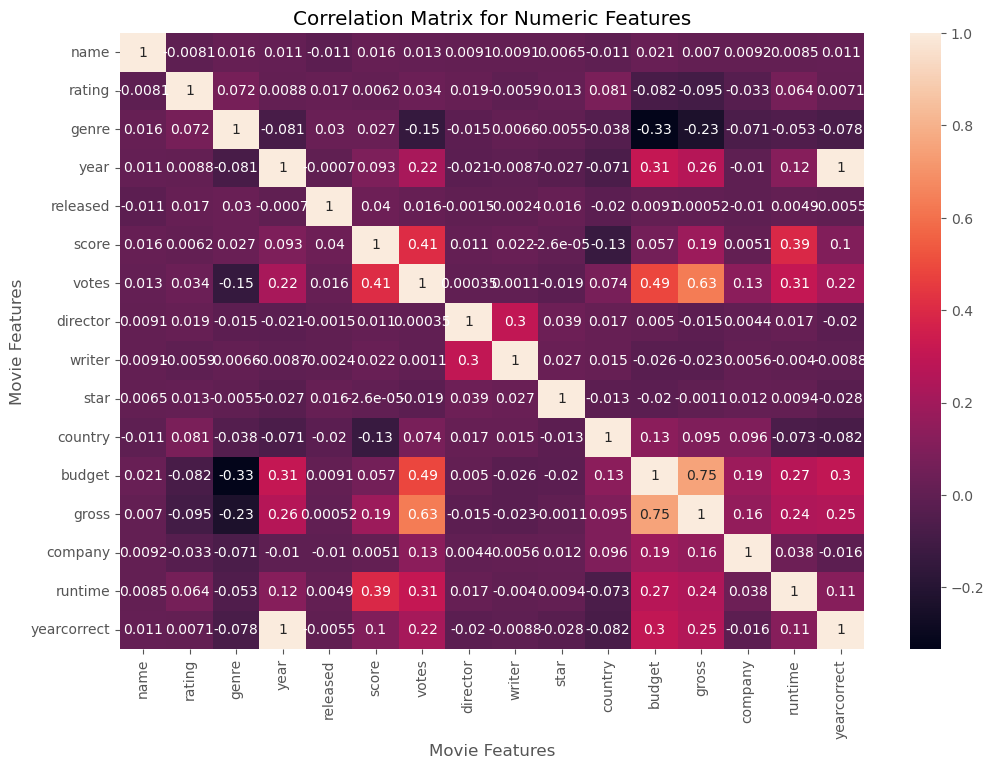

In [54]:
correlation_matrix = df.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [58]:
# Looks at company

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()      

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       6      0  2009       697    7.8  1100000.0      1155    1779   
7445   535       6      0  2019       184    8.4   903000.0       162     744   
3045  6896       6      6  1997       705    7.8  1100000.0      1155    1779   
6663  5144       6      0  2015       699    7.8   876000.0      1125    2551   
7244   536       6      0  2018       193    8.4   897000.0       162     744   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  2335       56  237000000  2847246203     2254    162.0           29  
7445  2242       56  356000000  2797501328     1607    181.0           39  
3045  1596       56  200000000  2201647264     2254    194.0           17  
6663   525       56  245000000  2069521700     1541    138.0           35  
7244  2242       56  321000000  2048359754     1607    149.0           38

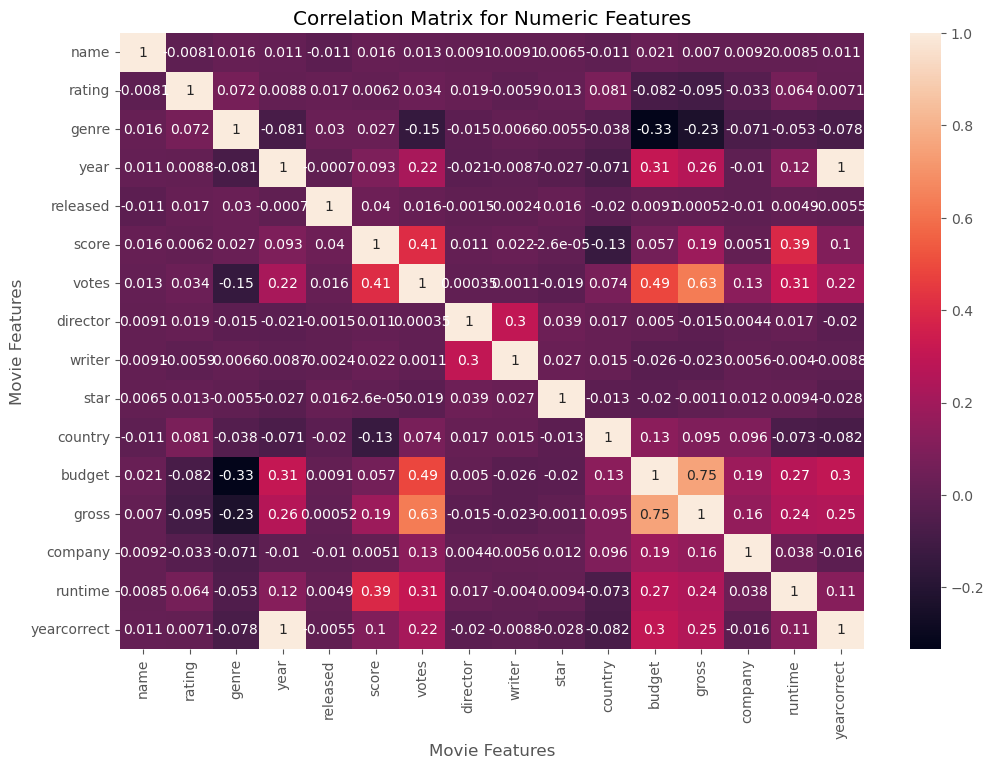

In [36]:
correlation_matrix = df_numerized.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [37]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.016377   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613  0.006192   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027384   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.092616   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.039814   
score        0.016377  0.006192  0.027384  0.092616  0.039814  1.000000   
votes        0.013038  0.033743 -0.145296  0.222427  0.015878  0.407101   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.010568   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.022098   
star         0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.000026   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133346   
budget       0.020548 -0.081939 -0.334021  0.309212  0.009145  0.056863   
gross        0.006989 -0.095450 -0.234297  0.261900  0.000519  0.186012   
company      0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.005081   
runtime      0.008483  0.064133 -0.052914  0.116358  0.004852  0.394564   
yearcorrect  0.011134  0.007054 -0.077550  0.997295 -0.005455  0.100212   

                votes  director    writer      star   country    budget  \
name         0.013038  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating       0.033743  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre       -0.145296 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year         0.222427 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released     0.015878 -0.001478 -0.002404  0.015777 -0.020427  0.009145   
score        0.407101  0.010568  0.022098 -0.000026 -0.133346  0.056863   
votes        1.000000  0.000349  0.001127 -0.019146  0.073525  0.486931   
director     0.000349  1.000000  0.299067  0.039234  0.017490  0.004976   
writer       0.001127  0.299067  1.000000  0.027245  0.015343 -0.025911   
star        -0.019146  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country      0.073525  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget       0.486931  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross        0.632870 -0.014916 -0.022997 -0.001129  0.095325  0.750157   
company      0.133457  0.004404  0.005646  0.012442  0.095548  0.186474   
runtime      0.306984  0.017062 -0.004036  0.009418 -0.073319  0.268372   
yearcorrect  0.217856 -0.020439 -0.008807 -0.027576 -0.082274  0.299603   

                gross   company   runtime  yearcorrect  
name         0.006989  0.009211  0.008483     0.011134  
rating      -0.095450 -0.032943  0.064133     0.007054  
genre       -0.234297 -0.071067 -0.052914    -0.077550  
year         0.261900 -0.010431  0.116358     0.997295  
released     0.000519 -0.010474  0.004852    -0.005455  
score        0.186012  0.005081  0.394564     0.100212  
votes        0.632870  0.133457  0.306984     0.217856  
director    -0.014916  0.004404  0.017062    -0.020439  
writer      -0.022997  0.005646 -0.004036    -0.008807  
star        -0.001129  0.012442  0.009418    -0.027576  
country      0.095325  0.095548 -0.073319    -0.082274  
budget       0.750157  0.186474  0.268372     0.299603  
gross        1.000000  0.156745  0.244339     0.254686  
company      0.156745  1.000000  0.037537    -0.016109  
runtime      0.244339  0.037537  1.000000     0.114737  
yearcorrect  0.254686 -0.016109  0.114737     1.000000

In [38]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.016377
             votes          0.013038
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.008483
             yearcorrect    0.011134
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score          0.006192
             votes          0.033743
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [39]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
gross        genre         -0.234297
genre        gross         -0.234297
votes        genre         -0.145296
genre        votes         -0.145296
score        country       -0.133346
country      score         -0.133346
rating       gross         -0.095450
gross        rating        -0.095450
country      yearcorrect   -0.082274
yearcorrect  country       -0.082274
rating       budget        -0.081939
budget       rating        -0.081939
year         genre         -0.081261
genre        year          -0.081261
yearcorrect  genre         -0.077550
genre        yearcorrect   -0.077550
country      runtime       -0.073319
runtime      country       -0.073319
genre        company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
genre        runtime       -0.052914
runtime      genre         -0.052914
genre        country       -0.037615
c

In [40]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        gross          0.632870
gross        votes          0.632870
budget       gross          0.750157
gross        budget         0.750157
year         yearcorrect    0.997295
yearcorrect  year           0.997295
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes & the budget have the highest correlation to gross earnings

# Company have low corerelation